In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

location = "../dataset/clothing.csv"
clothing_data = pd.read_csv(location)
clothing_data

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [2]:
# Install the following packages if not already present
# pip install plotly
# pip install surprise

import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure
from PIL import Image
import requests
from io import BytesIO
import os
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from scipy import sparse
import re

import warnings
warnings.simplefilter("ignore")

## Methods for easier visualization if needed

In [3]:
import matplotlib.pyplot as plt
import collections
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


# Plot a pivot graph by grouping columns of choice in a dataframe and save the image
# 
# Parameters
# df: Dataframe that needs to be used for plotting the graph
# columns: Columns upon which grouping needs to be done
# filename: Location/pathname where the resulting graph must be saved
def group_and_plot_pivot_graph(df, columns, filename):

    # Group by one or more columns of choice in the dataframe
    grouped_multiple = df.groupby(columns).size().reset_index()
    # Rename the grouped column with size of groups as count
    grouped_multiple.columns = columns + ['count']

    fig = plt.figure()
    grouped_multiple.pivot(columns[0], columns[1], 'count').plot(kind='bar')
    plt.ylabel('count')
    plt.legend(title=columns[1], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plot a pie chart based on a particular column of choice in a dataframe and save the image
# 
# Parameters
# df: Dataframe that needs to be used for plotting the graph
# columns: Columns upon which graph needs to be plotted
# filename: Location/pathname where the resulting graph must be saved
def plot_pie_chart(df, column, filename):
    fig, ax = plt.subplots()
    df[column].value_counts().plot(ax=ax, kind='pie')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


# Plot a bar graph based on a particular column of choice in a dataframe and save the image
# 
# Parameters
# df: Dataframe that needs to be used for plotting the graph
# columns: Columns upon which graph needs to be plotted
# filename: Location/pathname where the resulting graph must be saved
def plot_bar_graph(df, column, filename):
    fig, ax = plt.subplots()
    df[column].value_counts().plot(ax=ax, kind='bar')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


# Plot a histogram based on a particular column of choice in a dataframe and save the image
# 
# Parameters
# df: Dataframe that needs to be used for plotting the graph
# columns: Columns upon which graph needs to be plotted
# filename: Location/pathname where the resulting graph must be saved
def plot_hist_graph(df, column, filename):
    fig, ax = plt.subplots()
    df[column].plot(ax=ax, kind='hist')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Plot a line chart based on frequency of values in a particular column of choice in a dataframe and save the image
# 
# Parameters
# df: Dataframe that needs to be used for plotting the graph
# columns: Columns upon which graph needs to be plotted
# filename: Location/pathname where the resulting graph must be saved
def plot_line_chart(df, column, filename):
    frequency = collections.Counter(df[column])
    sorted_frequency = {}
    for key in sorted(frequency.keys()):
      sorted_frequency[key] = frequency[key]
    x = list(sorted_frequency.keys())
    y = list(sorted_frequency.values())
    fig, ax = plt.subplots()
    plt.plot(x, y)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Bivariat plot
# Column 2 must be numeric
def plot_bivariat(df, column1, column2):
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.style.use('fivethirtyeight')
    sns.boxenplot(df[column1], df[column2], palette = 'spring')
    plt.title(str(column1) +' vs '+ str(column2))
    plt.xticks(rotation = 90)
    plt.show()


# Strip plot
def strip_plot(df, column1, column2): 
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.style.use('fivethirtyeight')
    sns.stripplot(df[column1], df[column2], palette = 'Reds')
    plt.title("rating vs leng")
    plt.show()

# Second pie charts
def second_pie_plot(df, column):
    fea = df[column].value_counts()
    label_fea = fea.index
    size_fea = fea.values
    colors = ['yellow', 'lightgreen']
    fea_piechart = go.Pie(labels = label_bodyTypes,values = size_bodyTypes, marker = dict(colors = colors),name = 'body types', hole = 0.3)
    df2 = [fea_piechart]
    layout = go.Layout(title = 'Distribution of body type')
    fig = go.Figure(data = df2,layout = layout)
    py.iplot(fig)

# Violin plot
# Column 2 must be numeric
def violin_plot(df, column1, column2):
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.style.use('fivethirtyeight')
    sns.violinplot(df[column], df[column2], palette = 'cool')
    plt.title(column1 + " wise Mean " + column2)
    plt.show()

def distribution_plot(df, column):
    df[column].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
    plt.title('Distribution of Length in Reviews')
    plt.xlabel('lengths')
    plt.ylabel('count')
    plt.show()


### Preprocessing by Aishwarya

In [4]:
#modifying fit column
def compare_fit(x):
  if x == 'fit':
    return 0
  elif x == 'small':
    return -1
  else:
    return 1
  

def preprocessing_1(df):

  #preprocessing for fit - converted into numerical value
  # df['fit'] = df['fit'].apply(lambda x: compare_fit(x))
  #plot_pie_chart(df, 'fit', "filename.png")


  #preprocessing for rating - imputed by mean
  df['rating'].fillna((df['rating'].mean()), inplace=True)
  #plot_line_chart(df, 'rating', "filename.png")


  #preprocessing weight - imputed by mean
  df["weight"] = df["weight"].str.extract("(\d+)", expand=True)
  df = df.astype({'weight': 'float'})
  df['weight'].fillna((df['weight'].mean()), inplace=True)
  #plot_line_chart(df, 'weight', "filename.png")


  #preprocessing bust size - imputed by mode
  bust_data = df['bust size'].str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True)
  bust_data.columns = ['bust_size', 'bust_type']
  df = df.join(bust_data)
  df = df.astype({'bust_size': 'float'})
  df = df.drop(columns=['bust size'])

  df.loc[df['bust_size'].isna(), 'bust_size'] = df['bust_size'].value_counts().index[0]
  df.loc[df['bust_type'].isna(), 'bust_type'] = df['bust_type'].value_counts().index[0]
  #plot_line_chart(df, 'bust_size', "filename.png")
  #plot_line_chart(df, 'bust_type', "filename.png")

  return df

### Preprocessing by Anjali

In [5]:
def imputingRentFea(df):
    # Filling Nan values with value as "other"
    df['rented for'].fillna('other', inplace=True)
    return df

# Pre processing: 'body type'
# Imputing body type nan values by taking reference of bust size

def imputingBtFea(BT):
   
    BTnanCount = BT['body type'].isnull().value_counts()
   
    # Gives records of  non nan values of body type
    BTnonNanValues = BT[~BT['body type'].isnull()]

    # Gives records of nan values of body type
    BTnanValues= BT[BT['body type'].isnull()]
   
    # Extract body type values based on grouping bust size (Most frequent count)
    # Ref: https://librarycarpentry.org/library-python/04-merging-data/
    x = pd.DataFrame(BTnonNanValues.groupby('bust size')['bust size', 'body type'].apply(lambda x: x.mode()))
    
    # Drop created 'bust size' index 
    x.reset_index(inplace= True, drop = True)
    
    # Ref: https://librarycarpentry.org/library-python/04-merging-data/
    BTnanValues = pd.merge(BTnanValues, x, how ='left', left_on = 'bust size', right_on = 'bust size')
    
    # Append function add rows (works horizontally)
    BTmodeled = BTnonNanValues.append(BTnanValues,sort=True)
    BTmodeled['body type'].fillna(BTmodeled['body type_y'], inplace=True)
    
    del BTmodeled['body type_y']
    del BTmodeled['body type_x']
    print(BTmodeled['body type'].isnull().value_counts()) 
    return BTmodeled
  
# Imputing body type nan values by taking referenc of size

def imputingBtFea_size(BT):
    #BT.groupby('size')['body type'].last()
    BTimputedVals = dict(BT.groupby('size')['body type'].last())
    #print(BTimputedVals)
    BT['body type']=BT['body type'].fillna(BT['size'].map(BTimputedVals))
    #print(BT["body type"].isnull().value_counts())
    return BT

def preprocessing_2(df):
    df['rented for'] = pd.Series(imputingRentFea(df)['rented for'].values)
    df['body type'] = pd.Series(imputingBtFea_size(df)['body type'].values)
    return df
# d=preprocessing_2(clothing_data.copy()) 
# print(d['body type'].isnull().value_counts())
# print(d['rented for'].isnull().value_counts())

Additional visualizations for all text present in the dataset

False    192482
True         62
Name: review_text, dtype: int64
/n/n
          fit  user_id bust size  item_id  weight  rating     rented for  \
177735    fit   305494       36d  1158451  160lbs     8.0           work   
43213   small   282679       32d   321100  117lbs     8.0       everyday   
136253    fit   695719       34d  1446293  150lbs    10.0  formal affair   
10822     fit   287755       32b   179124  105lbs     8.0       everyday   
176274    fit   815571       34c  1147823  110lbs     8.0        wedding   

       review_text  body type  \
177735           -      apple   
43213            .     petite   
136253           .  full bust   
10822            -  hourglass   
176274           .   athletic   

                                           review_summary category height  \
177735                                                  -    dress  5' 4"   
43213                                                   .  blouson  5' 2"   
136253                                      

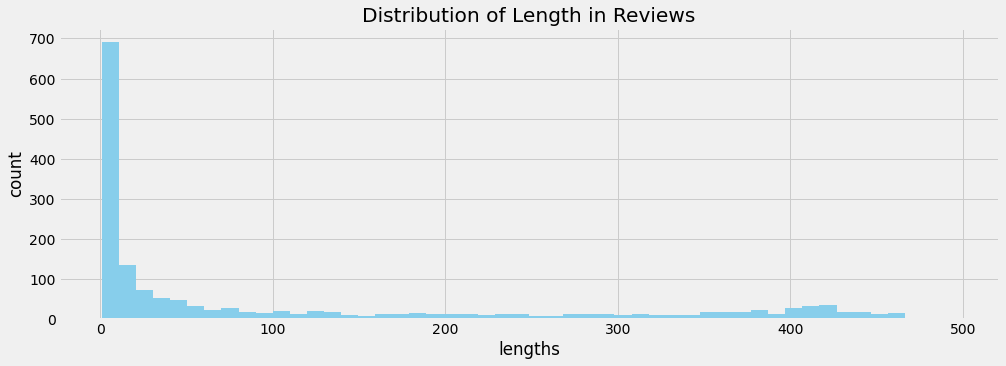

In [6]:
# Data visualisation: review_text

from sklearn.feature_extraction.text import CountVectorizer

#stop_words=stopwords.words('english')
RT=clothing_data.copy()

# 62 null values
review_textNanCount= RT['review_text'].isnull().value_counts()
print(review_textNanCount)
print('/n/n')

# Add a new column which has length of review
RT['leng'] = RT['review_text'].apply(lambda x:len(str(x)))

# Many people wrote review of single letter
print(RT.sort_values(by='leng').head())

print(RT[RT['leng'] == 1]['review_text'].value_counts().head())

# Distribution of review length written by poeple
# It shows most of the reviews are so short that is 1-3
print('\n\n')
distribution_plot(RT, 'leng')


In [7]:
 # Data visualisation: 'review_summary'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer


 RS=clothing_data.copy()
 RS = RS.dropna()

# Computing most popular words usinf TF-IDF and clustering
tfidf = TfidfVectorizer( min_df = 5, max_df = 0.95, max_features = 15000, stop_words = 'english')
tfidf.fit(RS.review_summary)
text = tfidf.transform(RS.review_summary)

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        # f, ax = plt.subplots(1, 1)
        # ax.plot(iters, sse, marker='o')
        # ax.set_xlabel('Cluster Centers')
        # ax.set_xticks(iters)
        # ax.set_xticklabels(iters)
        # ax.set_ylabel('SSE')
        # ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)           
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters

Cluster 0
gown,felt,flattering,absolutely,fit,comfortable,compliments,color,dress,gorgeous

Cluster 1
got,fun,comfortable,wedding,compliments,perfect,loved,great,beautiful,dress

Cluster 2
fun,loved,color,fit,cute,dress,great,compliments,comfortable,perfect


### Preprocessing by Jayasurya

In [8]:
import math
def inches_from_feet(feet):
  if type(feet) != str and math.isnan(feet):
    return float('nan')
  else:
    return 12 * int(feet[0]) + int(feet[3])


def convert_size(size):
  if size < 5:
    return "XS"
  elif size < 10:
    return "S"
  elif size < 15:
    return "M"
  elif size < 20:
    return "L"
  else:
    return "XL"

def mark_rare_categories(category, counts):
  if counts[category] < 100:
    return "Others"
  return category


# Return processed df
def preprocessing_3(df):

  replace_category = {
    'culotte': 'culottes',
    'legging': 'leggings',
    'pant': 'pants',
    'skirt': 'skirts', 
    'skort': 'skirts',
    'trouser': 'trousers',
    'cami': 'crewneck', 
    'henley': 'crewneck', 
    'duster': 'crewneck',
    'sheath': 'shift',
    'down': 'gown'
  }
  df['category'].replace(replace_category, inplace = True)
  category_count = df['category'].value_counts()
  df['category'] = df['category'].apply(lambda x: mark_rare_categories(x, category_count))
  # all_categories = {}
  # for index, val in enumerate(sorted(df['category'].unique())):
  #   all_categories[val] = index
  # df['category'] = df['category'].apply(lambda x: all_categories[x])
  # plot_hist_graph(df, 'category', 'filename.png')


  # Processing height
  df['height'] = df['height'].apply(lambda x: inches_from_feet(x))
  df['height'].fillna(int(df['height'].mean()), inplace=True)
  # plot_line_chart(df, 'height', "filename.png")


  # Processing size
#   plot_line_chart(df, 'size', "filename.png")
  df['size'] = df['size'].apply(lambda x: convert_size(x))
  # plot_pie_chart(df, 'size', "filename.png")

  # Processing age
  median_age = df['age'].median()
  df['age'].fillna(median_age, inplace=True)
  df.loc[((df['age'] == 0) | (df['age'] >= 100)), 'age'] = median_age
  # plot_line_chart(df, 'age', "filename.png")
  
  return df

## Combine all preprocessing

In [9]:
clothing_data1 = preprocessing_1(clothing_data.copy())
clothing_data2 = preprocessing_2(clothing_data1.copy())
clothing_data3 = preprocessing_3(clothing_data2.copy())
clothing_data_processed = clothing_data3.drop(['review_date'], axis=1)
clothing_data_processed

,fit,user_id,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,bust_size,bust_type
0,fit,420272,2260466,137.000000,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,M,28.0,34.0,d
1,fit,273551,153475,132.000000,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,M,36.0,34.0,b
2,fit,360448,1063761,137.391709,10.0,party,This hugged in all the right places! It was a ...,petite,It was a great time to celebrate the (almost) ...,shift,64.0,XS,32.0,34.0,c
3,fit,909926,126335,135.000000,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,S,34.0,34.0,c
4,fit,151944,616682,145.000000,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,M,27.0,34.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,140.000000,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69.0,S,42.0,34.0,dd
192540,fit,118398,682043,100.000000,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.0,XS,29.0,32.0,c
192541,fit,47002,683251,135.000000,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68.0,S,31.0,36.0,a
192542,fit,961120,126335,165.000000,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66.0,L,31.0,36.0,c


In [10]:
clothing_data_processed.to_csv('../dataset/clothing_data_processed.csv', index = False)